In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

The slowest run took 169.74 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 99 µs per loop
13.843921257365539


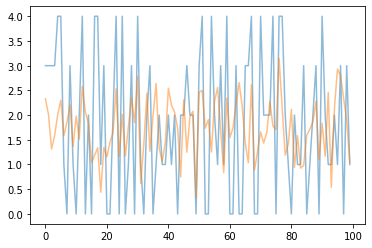

In [ ]:
np.random.seed(42)
A = np.random.randint(0, 5, size=(100,10))
y = np.random.randint(0, 5, size=100)

%timeit x = np.linalg.lstsq(A, y, rcond=None)[0]

x = np.linalg.lstsq(A, y, rcond=None)[0]
error = np.linalg.norm(y - A@x)
print(error)

plt.plot(y, alpha=0.5)
plt.plot(A@x, alpha=0.5)
plt.show()

100 loops, best of 5: 8.5 ms per loop
31.135202822775767


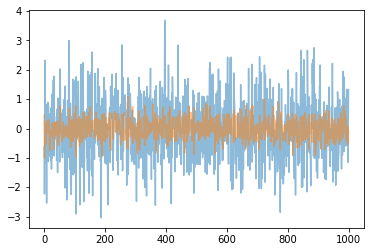

In [ ]:
A = np.random.randn(1000,100)
y = np.random.randn(1000)

%timeit x = np.linalg.lstsq(A, y, rcond=None)[0]

x = np.linalg.lstsq(A, y, rcond=None)[0]
error = np.linalg.norm(y - A@x)
print(error)

plt.plot(y, alpha=0.5)
plt.plot(A@x, alpha=0.5)
plt.show()

 n = 3: 0.857123460498547
 n = 4: 0.9473469826562888
object: 0.9


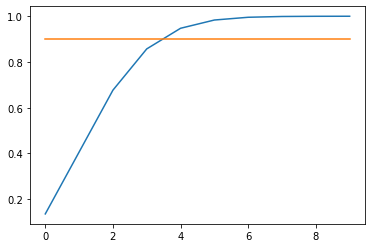

In [ ]:
x = np.arange(10)
l = np.ones_like(x) * 0.9

A = np.zeros((10,10))
for i in x:
    A[i,:i+1] = 1

y_ = A @ (2 ** x / factorial(x)) / np.exp(2)

print(f" n = 3: {y_[3]}")
print(f" n = 4: {y_[4]}")
print(f"object: {l[0]}")
plt.plot(y_)
plt.plot(l)
plt.show()

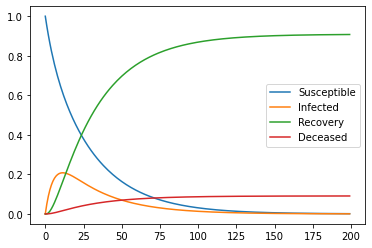

In [ ]:
X = np.zeros((200,4))
x = np.array([1,0,0,0])
A = np.array([[0.95, 0.04, 0, 0],
              [0.05, 0.85, 0, 0],
              [0   , 0.10, 1, 0],
              [0   , 0.01, 0, 1]])

X[0,:] = x

for i in range(X.shape[0]-1):
    X[i+1,:] = np.dot(A, X[i,:])

plt.plot(X[:,0], label="Susceptible")
plt.plot(X[:,1], label="Infected")
plt.plot(X[:,2], label="Recovery")
plt.plot(X[:,3], label="Deceased")
plt.legend()

plt.show()

In [ ]:
A = np.array([[-1,-1, 0, 1, 0],
              [ 1, 0,-1, 0, 0],
              [ 0, 0, 1,-1,-1],
              [ 0, 1, 0, 0, 1]])
s = np.array([1,0,-1,0])
x1 = np.array([1,-1,1,0,1])
x2 = np.array([0.6,0.3,0.6,-0.1,-0.3])
print(np.linalg.norm(np.dot(A,x1)))
print(np.linalg.norm(np.dot(A,x2) + s))

0.0
0.0


In [ ]:
v1 = np.array([1,-1,2,-1])
v2 = np.array([1,2,2,1])
print(np.linalg.norm(np.dot(A.T, v1))**2)
print(np.linalg.norm(np.dot(A.T, v2))**2)

27.0
2.9999999999999996


In [ ]:
n = 10
m = 15
p = n + m - 1

a = np.random.randint(0,3,size=n)
b = np.random.randint(0,3,size=m)
c = np.zeros((p))

for k in range(p):
    tmp = 0
    for i in range(n):
        for j in range(m):
            if i+j+2 == k+2:
                tmp += a[i]*b[j]
            else:
                pass
    c[k] = tmp

In [ ]:
T = np.zeros((p,n))

for i in range(p-m):
    T[i:i+m,i] = b

np.linalg.norm(c - np.dot(T,a))

0.0

In [ ]:
B = np.array([[1/4,1/4],
              [1/4,1/4]])
X_ = np.array([[1,1],
               [1,0]])
X_ @ B

array([[0.5 , 0.5 ],
       [0.25, 0.25]])

In [ ]:
x = np.array([[1/10,3/10]])
y = np.array([[1],[3]])
x.T @ y.T

array([[0.1, 0.3],
       [0.3, 0.9]])

In [ ]:
x0 = np.array([0,0])
dt = 0.01
T = 2.5
mu = 1
m = 1

f1 = 1.0
f2 = -1.3
f = np.zeros((600,1))
f[50:100] = f1
f[100:140] = -1.3

A = np.array([[1,          dt],
              [0, 1 - dt*mu/m]])

B = np.array([[   0],
              [dt/m]])

x = np.zeros((2,600))
x[:,0] = x0

for i in range(x.shape[1]-1):
    x[:,i+1] = np.dot(A,x[:,i]) + np.dot(B,f[i])

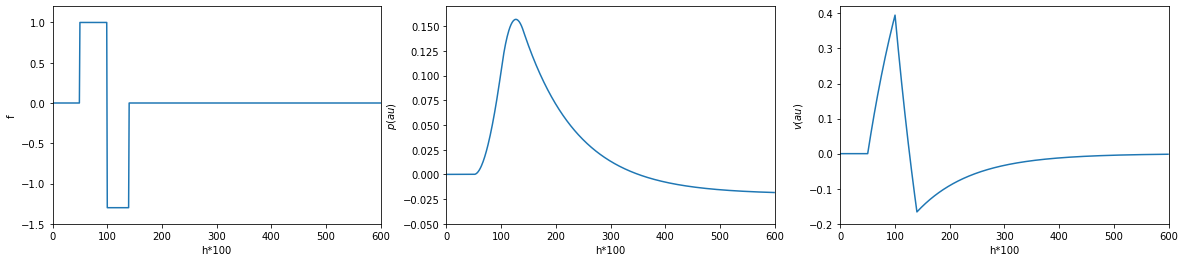

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.plot(f[:], label="force")
plt.xlabel("h*100")
plt.ylabel("f")
plt.xlim(0,600)
plt.ylim(-1.5,1.2)

plt.subplot(132)
plt.plot(x[0,:], label="position")
plt.xlabel("h*100")
plt.ylabel("$p(\tau)$")
plt.xlim(0,600)
plt.ylim(-0.05,0.17)

plt.subplot(133)
plt.plot(x[1,:], label="velocity")
plt.xlabel("h*100")
plt.ylabel("$v(\tau)$")
plt.xlim(0,600)
plt.ylim(-0.2,0.42)

plt.show()

In [20]:
p1, p2 = np.mgrid[0.1:1.0:0.1,0.1:1.0:0.1]

d1 = p2/p1
d2 = (1-p2)/(1-p1)

In [42]:
m = 100

result = np.zeros((m,d1.shape[0],d1.shape[1]))
result2 = np.zeros(m)

for i in range(m):
    result[i,:,:] = (d1**i) * (d2**(m-i))

result = 1 / (1 + result)

result = result > (1/2)
for i in range(d1.shape[0]):
    result[:,i,:i+1] = 0

for i in range(m):
    result2[i] = np.sum(result[i,:,:]) / 36

print(result2)
print(result2[int(m/2)])

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.97222222 0.97222222 0.97222222
 0.97222222 0.94444444 0.94444444 0.94444444 0.94444444 0.91666667
 0.91666667 0.88888889 0.88888889 0.86111111 0.86111111 0.86111111
 0.83333333 0.83333333 0.80555556 0.80555556 0.77777778 0.75
 0.75       0.72222222 0.72222222 0.69444444 0.66666667 0.66666667
 0.63888889 0.63888889 0.61111111 0.55555556 0.55555556 0.55555556
 0.55555556 0.55555556 0.55555556 0.44444444 0.44444444 0.44444444
 0.44444444 0.44444444 0.38888889 0.36111111 0.36111111 0.33333333
 0.33333333 0.30555556 0.27777778 0.27777778 0.25       0.25
 0.22222222 0.19444444 0.19444444 0.16666667 0.16666667 0.13888889
 0.13888889 0.13888889 0.11111111 0.11111111 0.08333333 0.08333333
 0.05555556 0.05555556 0.05555556 0.05555556 0.02777778 0.02777778
 0.02777778 0.02777778 0.         0.         0.         0.
 0.         0.         0.      

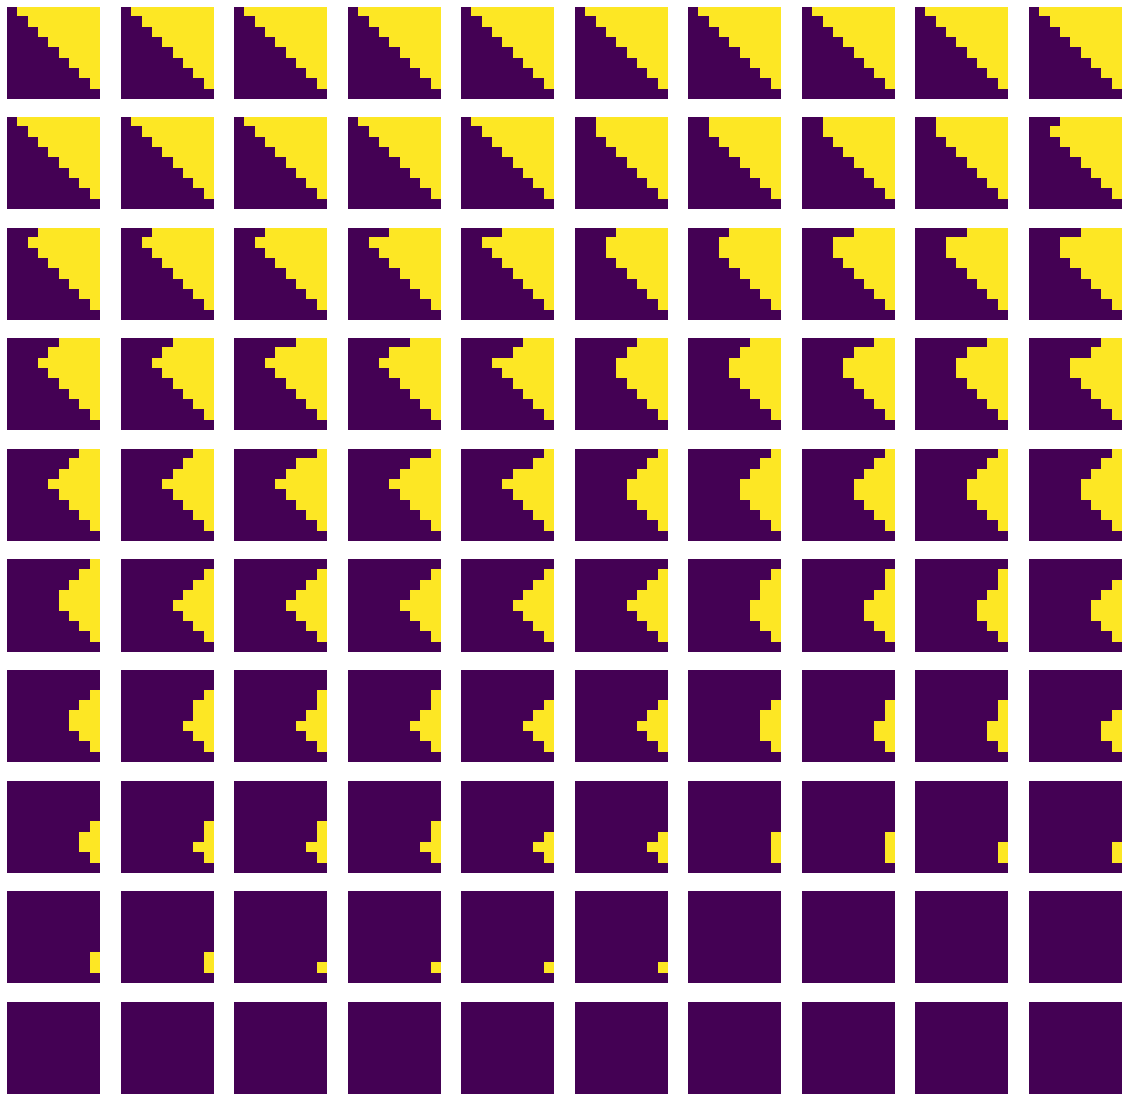

In [41]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(result[i,:,:])
    plt.axis("off")
plt.show()